<a href="https://colab.research.google.com/github/bigirimanainnocent12/ANOVA/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analyse de la variance à un facteur***

# ***Introduction***

Rémi est un philatéliste passionné. Il collectionne particulièrement les timbres d'Allemagne,d'Autriche, de Belgique et de France. Il a l'impression qu'il a plus de mal à décoller sans les abîmer les timbres français. Il pense que ces timbres sont peut-être moins épais que les autres. Il sélectionne de manière aléatoire des timbres non abîmés dans sa collection en se limitant aux 4 pays dont il a le plus de timbres. Il fait mesurer l'épaisseur de ces timbres par une société équipée pour faire des mesures en micromètre. Il obtient le jeu de données timbres.csv. Calculez les statistiques descriptives puis faites le traitement statistique adéquat pour que Rémi puisse déterminer si l'épaisseur moyenne des timbres diffère selon les pays.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***importation de la base de données***

In [2]:
df=pd.read_csv('/content/timbres.csv',sep=';')
df.head()

,Unnamed: 0,epaisseur,pays
0,1,263,Belgique
1,2,259,Belgique
2,3,246,Belgique
3,4,255,Belgique
4,5,260,Belgique


# ***Statistiques Descriptives***

In [3]:
df.groupby('pays')['epaisseur'].describe()

,count,mean,std,min,25%,50%,75%,max
pays,,,,,,,,
Allemagne,19.0,251.631579,6.048053,238.0,246.50,252.0,256.0,261.0
Autriche,25.0,251.840000,6.276145,242.0,246.00,252.0,258.0,265.0
Belgique,23.0,253.217391,6.828793,237.0,247.50,254.0,258.0,265.0
France,22.0,210.772727,8.518505,196.0,205.25,211.0,216.0,230.0


# ***Les hypothèses du test et choix du test***


La question de Rémy est de savoir si l'épaisseur moyenne des timbres diffère selon les pays. Nous allons utiliser un test paramétrique, tel que l'analyse de la variance (ANOVA), pour tenter de répondre à cette question.

Le modèle s'écrit en général:

 $Y_{ij}=\mu+\alpha_j+\epsilon_{ij}$ avec ∀ j ∈ {1,2,3,4}, $\{Y_{1j} $,...,
 $Y_{n_{j}j} \}$, les réponses des observations pour lesquelles x = j et ∀ i ∈ {1,..,$n_{j}$}, $\mathbb{E}(\epsilon_{ij})=0$


***Les hypothèses du test sont: ***

- $H_0$: Il n'y a pas de différence significative entre les
moyennes des épaisseurs des timbres des différents pays.
- $H_1$ : Il y a au moins une moyenne des timbres
différente des autres moyennes des épaisseurs des timbres des différents pays.








# ***Choix du seuil***

Le seuil de significativité ($\alpha$) est généralement fixé à 0,05. Cela signifie que si la p-valeur obtenue à partir du test est inférieure à 0,05, nous pouvons rejeter l'hypothèse nulle et conclure qu'il existe une différence significative entre les moyennes des épaisseurs des timbres des différents pays.


# ***Vérifications des conditions d’application du test (ANOVA)***

# **1. Test de Shapiro- Wilk**

Le test de Shapiro-Wlk est un test statistique utilisé pour tester si un échantillon de données proviennent d'une population normalement distribution.
Les hypothèses du test sont:

$H_0$: l'échantillon est issu d'une population normalement distribuée

$H_1$: l'échantillon n'est pas issu d'une population normalement distribuée

**Résulats du test:**

In [4]:
import pandas as pd
from scipy import stats
resultats = []
for groupe, donnees in df.groupby('pays')['epaisseur']:
    if len(donnees) >= 3:
        test = stats.shapiro(donnees)
        resultats.append({
            'Groupe': groupe,
            'Statistique W': test.statistic,
            'P-valeur': test.pvalue
        })
    else:
        resultats.append({
            'Groupe': groupe,
            'Statistique W': None,
            'P-valeur': None
        })

# Créer un tableau avec les résultats
tableau_resultats = pd.DataFrame(resultats)
print(tableau_resultats)


      Groupe  Statistique W  P-valeur
0  Allemagne       0.965839  0.691245
1   Autriche       0.951597  0.272311
2   Belgique       0.975111  0.808631
3     France       0.979789  0.912666


Toutes les p-valeurs sont supérieures à 0,05. Nous acceptons donc $H_0$ et concluons que les trois échantillons proviennent de populations normalement distribuées.

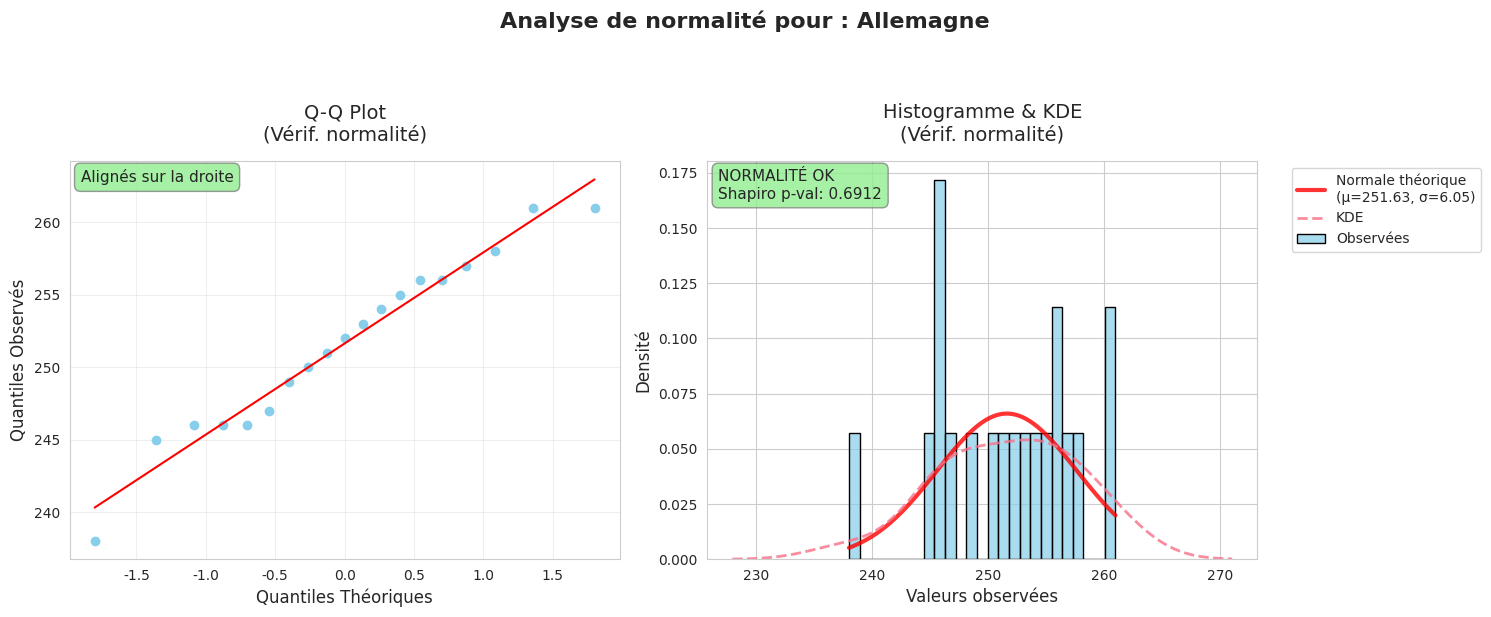

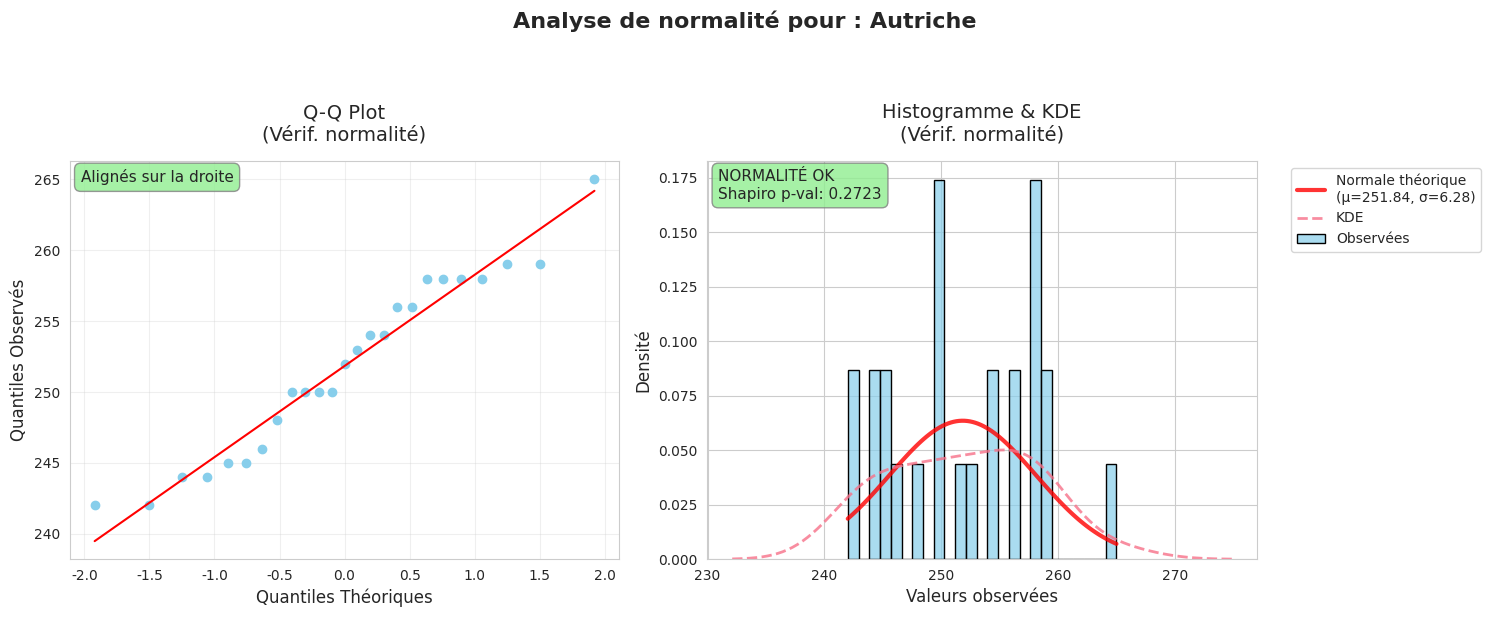

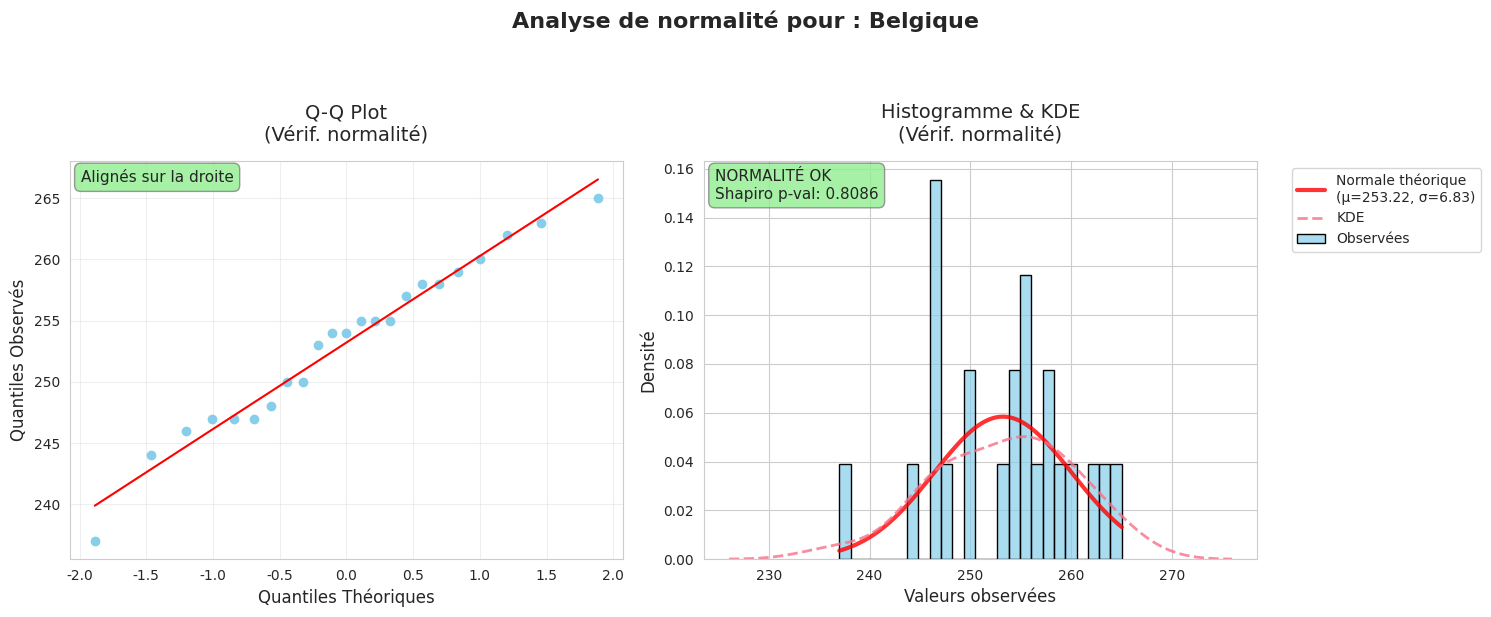

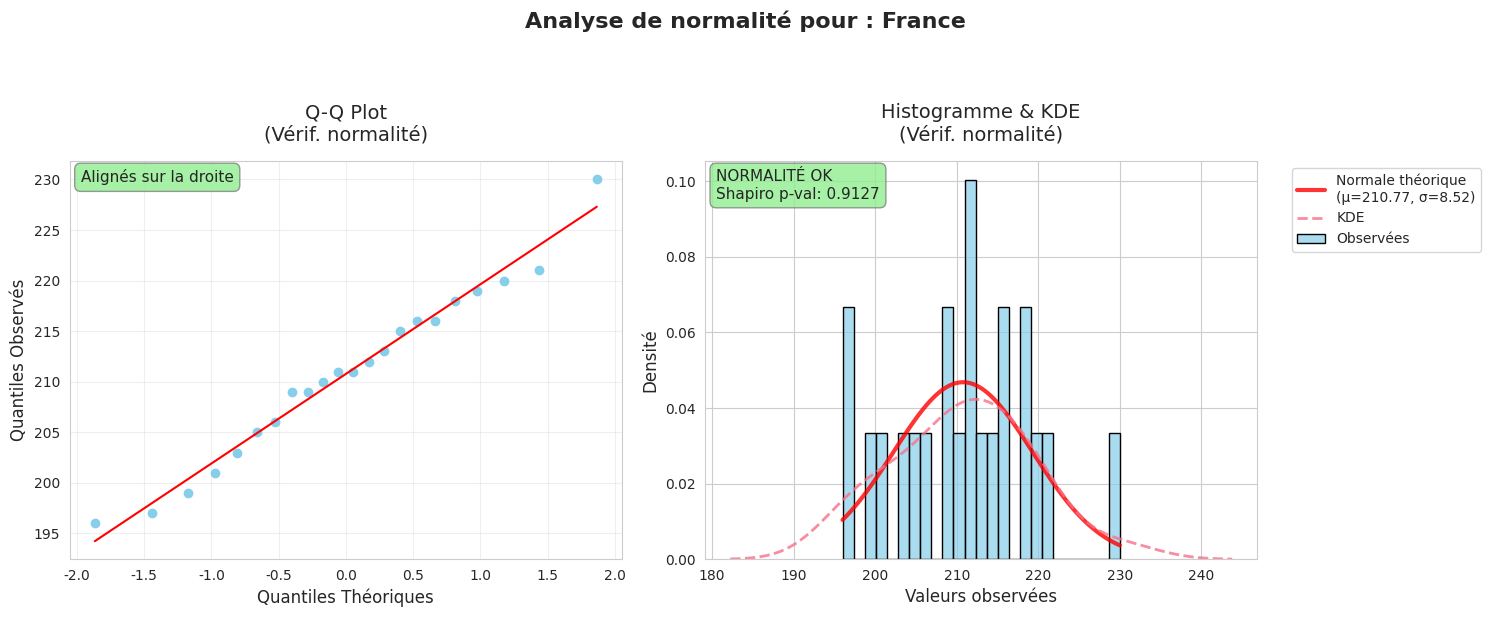

In [5]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import probplot

# Configuration pour les caractères Unicode/emojis avec Seaborn
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn moderne
sns.set_style("whitegrid")
sns.set_palette("husl")

# Boucle sur chaque pays
for groupe, donnees in df.groupby('pays')['epaisseur']:
    # Structure 1x2 pour deux graphiques côte à côte
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Titre global précisant le pays
    fig.suptitle(f'Analyse de normalité pour : {groupe}',
                 fontsize=16, fontweight='bold', y=1.02)

    # =============================================================================
    # 1) Q-Q Plot
    # =============================================================================
    probplot(donnees, dist="norm", plot=axes[0])
    # Personnalisation couleurs
    axes[0].get_lines()[0].set_markerfacecolor('skyblue')
    axes[0].get_lines()[0].set_markeredgecolor('skyblue')
    axes[0].get_lines()[1].set_color('red')
    axes[0].set_title('Q-Q Plot\n(Vérif. normalité)', fontsize=14, pad=15)
    axes[0].set_xlabel('Quantiles Théoriques', fontsize=12)
    axes[0].set_ylabel('Quantiles Observés', fontsize=12)
    axes[0].grid(True, alpha=0.3)

    # Test de normalité (Shapiro-Wilk)
    shapiro_stat, shapiro_pvalue = stats.shapiro(donnees)
    if shapiro_pvalue > 0.05:
        interp_qq, box_color = "Alignés sur la droite", "lightgreen"
    else:
        interp_qq, box_color = "Déviations notables", "lightcoral"
    axes[0].text(
        0.02, 0.98, interp_qq,
        transform=axes[0].transAxes, fontsize=11,
        va='top', bbox=dict(boxstyle="round,pad=0.4",
                             facecolor=box_color, alpha=0.8, edgecolor='gray')
    )

    # =============================================================================
    # 2) Distribution + KDE
    # =============================================================================
    sns.histplot(
        donnees, bins=25, stat='density', alpha=0.7,
        color='skyblue', edgecolor='black', ax=axes[1], label='Observées'
    )
    mu, sigma = donnees.mean(), donnees.std()
    x_norm = np.linspace(donnees.min(), donnees.max(), 100)
    y_norm = stats.norm.pdf(x_norm, mu, sigma)
    axes[1].plot(
        x_norm, y_norm, color='red', linewidth=3,
        label=f'Normale théorique\n(μ={mu:.2f}, σ={sigma:.2f})', alpha=0.8
    )
    sns.kdeplot(
        donnees, ax=axes[1], linewidth=2, alpha=0.8,
        label='KDE', linestyle='--'
    )
    axes[1].set_title('Histogramme & KDE\n(Vérif. normalité)', fontsize=14, pad=15)
    axes[1].set_xlabel('Valeurs observées', fontsize=12)
    axes[1].set_ylabel('Densité', fontsize=12)
    axes[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    if shapiro_pvalue > 0.05:
        interp_dist, box_color2 = "NORMALITÉ OK", "lightgreen"
    else:
        interp_dist, box_color2 = "NON-NORMALITÉ", "lightcoral"
    axes[1].text(
        0.02, 0.98,
        f"{interp_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
        transform=axes[1].transAxes, fontsize=11,
        va='top', bbox=dict(boxstyle="round,pad=0.4",
                             facecolor=box_color2, alpha=0.8, edgecolor='gray')
    )

    # Mise en page finale
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# **Test de Bartlett**

Le test de Bartlett est un test statistique utilisé pour vérifier l'homogeneité des variances de plus de deux échantillons.

**Les hypothèses test sont:**

- $H_0$: Il n'y a pas de différence significative entre les
variances des épaisseurs des timbres des différents pays.

- $H_1$ : Il y a au moins une variance des timbres
différente des autres variances des épaisseurs des timbres des différents pays.

In [6]:
from scipy import stats
groupes = [pays['epaisseur'].values for nom, pays in df.groupby('pays')]


groupes = [np.asarray(g) for g in groupes]

# Exécution du test de Bartlett
stat, p_value = stats.bartlett(*groupes)
print(f"Statistique de Bartlett = {stat:.4f}, p-valeur = {p_value:.4f}")

Statistique de Bartlett = 5.4112, p-valeur = 0.1440


La p-valeurs=0.3838 supérieures à 0,05. Nous acceptons donc $H_0$ et concluons que les trois échantillons ont une même  variabilité (variances égales).

# ***Résultats du test ANOVA:***

In [14]:
import pandas as pd
import pingouin as pg


# ANOVA à un facteur
anova = pg.anova(dv='epaisseur', between='pays', data=df, detailed=True)

# Affichage des résultats
anova

,Source,SS,DF,MS,F,p-unc,np2
0,pays,28530.442268,3,9510.147423,194.619308,5.824759e-38,0.872918
1,Within,4153.557732,85,48.865385,NaN,NaN,NaN


# **🧪 Interprétation des résultats de l’ANOVA**
La valeur de la statistique F est de 194.62, avec 3 degrés de liberté pour le facteur "pays" et 85 degrés de liberté pour l’erreur (résidu).
La p-valeur est extrêmement faible (5.82 × 10⁻³⁸), bien inférieure au seuil de 0.05, ce qui indique une différence hautement significative entre les groupes.

# **🔍 Conclusion :**
Nous rejetons l’hypothèse nulle H₀, et nous concluons qu’au moins une moyenne d’épaisseur de timbres diffère significativement des autres selon le pays.

# **📊 Analyse complémentaire**
np² (eta carré partiel) = 0.873
→ Cela signifie que 87.3 % de la variance totale de l’épaisseur des timbres est expliquée par le facteur "pays".
→ C’est une très grande taille d’effet, ce qui montre que le pays a une influence majeure sur l’épaisseur des timbres.
# **🔁 Tests post-hoc recommandés**
Puisque l’ANOVA indique une différence globale significative, il est pertinent de réaliser des tests post-hoc pour identifier quels pays diffèrent entre eux

# **Test de comparaison multiples**

Les tests de comparaisons multiples avec la correction de Tukey est une méthode d'analyse statistique permettant de comparer tous les groupes entre eux de manière simultanée. Cette méthode est utilisée lorsque nous avons plus de deux groupes à comparer et que nous souhaitons déterminer les différences significatives entre ces groupes.

In [16]:
import pandas as pd
import pingouin as pg

tukey_results = pg.pairwise_tukey(data=df, dv='epaisseur', between='pays')

tukey_results

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Allemagne,Autriche,251.631579,251.840000,-0.208421,2.127552,-0.097963,9.996606e-01,-0.033122
1,Allemagne,Belgique,251.631579,253.217391,-1.585812,2.167128,-0.731758,8.840742e-01,-0.239770
2,Allemagne,France,251.631579,210.772727,40.858852,2.189296,18.663011,1.876277e-14,5.356420
3,Autriche,Belgique,251.840000,253.217391,-1.377391,2.019702,-0.681977,9.036831e-01,-0.206959
4,Autriche,France,251.840000,210.772727,41.067273,2.043470,20.096833,1.876277e-14,5.451067
5,Belgique,France,253.217391,210.772727,42.444664,2.084643,20.360641,1.876277e-14,5.415261


# **🧪 Objectif du test de Tukey**
Le test de Tukey permet de comparer chaque paire de pays pour déterminer quelles différences d’épaisseur de timbres sont statistiquement significatives après une ANOVA.

# **📊 Interprétation des résultats**

# ✅ Comparaisons significatives :
Les paires suivantes montrent des différences significatives (p-value très faible) :

- Allemagne vs France

Différence moyenne : +40.86 unités
p-value : 1.88 × 10⁻¹⁴
Taille d’effet (Hedges’ g) : 5.36 → très grande différence
- Autriche vs France

Différence moyenne : +41.07 unités
p-value : 1.88 × 10⁻¹⁴
Taille d’effet : 5.45 → très grande différence
- Belgique vs France

Différence moyenne : +42.44 unités
p-value : 1.88 × 10⁻¹⁴
Taille d’effet : 5.42 → très grande différence
👉 Ces résultats indiquent que la France se distingue nettement des trois autres pays en termes d’épaisseur de timbres.

# ❌ Comparaisons non significatives :
Les paires suivantes ne montrent pas de différence significative :

- Allemagne vs Autriche

Différence : -0.21 unités
p-value : 0.9997
Taille d’effet : -0.03 → négligeable
- Allemagne vs Belgique

Différence : -1.59 unités
p-value : 0.884
Taille d’effet : -0.24 → faible
- Autriche vs Belgique

Différence : -1.38 unités
p-value : 0.904
Taille d’effet : -0.21 → faible

👉 Ces résultats montrent que l’Allemagne, l’Autriche et la Belgique ont des épaisseurs de timbres similaires.

# 🧠 Conclusion finale
Le test post-hoc de Tukey révèle que la France présente une épaisseur de timbres significativement plus faible que les autres pays (Allemagne, Autriche, Belgique), avec des différences très marquées et hautement significatives.
En revanche, aucune différence significative n’est observée entre l’Allemagne, l’Autriche et la Belgique, qui forment un groupe homogène.